In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from IPython.display import display

In [2]:
def parse_dollars(dollars_str):
    assert dollars_str[0] == '$'
    return float(dollars_str[1:])

In [3]:
d = pd.read_csv('amazon.csv', parse_dates=['Order Date'],
               converters={
        'Item Subtotal': parse_dollars,
        'Item Total': parse_dollars,
    })
d['year'] = d['Order Date'].dt.year
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 37 columns):
Order Date                        300 non-null datetime64[ns]
Order ID                          300 non-null object
Title                             300 non-null object
Category                          279 non-null object
ASIN/ISBN                         300 non-null object
UNSPSC Code                       256 non-null float64
Website                           300 non-null object
Release Date                      121 non-null object
Condition                         300 non-null object
Seller                            300 non-null object
Seller Credentials                1 non-null object
List Price Per Unit               300 non-null object
Purchase Price Per Unit           300 non-null object
Quantity                          300 non-null int64
Payment Instrument Type           300 non-null object
Purchase Order Number             0 non-null float64
PO Line Number            

In [4]:
ts = d[['Item Subtotal', 'Item Total', 'year']].copy()
tsby = ts.groupby('year').sum()
tsby

,Item Subtotal,Item Total
year,,
2009,166.07,166.07
2010,34.94,34.94
2011,270.32,270.32
2012,1730.77,1822.05
2013,2746.60,2908.60
2014,1936.17,2048.03
2015,6240.86,6664.90
2016,872.88,914.05


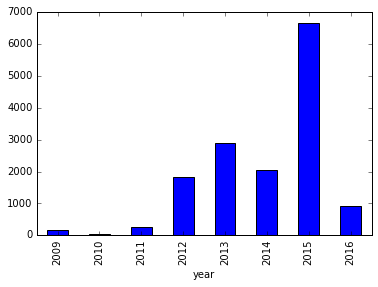

In [5]:
tsby['Item Total'].plot(kind='bar')

In [6]:
with pd.option_context('display.max_rows', 999):
    ms = d.loc[d.groupby(['year', 'Category'])['Item Total'].idxmax()]
    display(ms.set_index(['year', 'Category'])[['Title', 'Item Total']])

Title  \
year Category                                                                      
2009 Paperback                 Human-Machine Reconfigurations: Plans and Situ...   
     Sports                             Dynaflex Pro Sports Gyro Wrist Exerciser   
     Video Game                                        Kingdom Hearts 358/2 Days   
2010 Audio CD                                    Eagles : The Very Best Of (2CD)   
     DVD                                               The Sorcerer's Apprentice   
2011 Blu-ray                   The Lion King (Two-Disc Diamond Edition Blu-ra...   
     DVD                       Dog the Bounty Hunter: Best of Seasons 1, 2 and 3   
     Hardcover                 The Titan's Curse (Percy Jackson and the Olymp...   
     Health and Beauty         Philips Norelco 1150x/40 SensoTouch 2d Electri...   
     Home                      Pike Street 100-Percent Egyptian Cotton 725-Gr...   
     Personal Computers        SanDisk Cruzer 16 GB Cruzer USB 2.0 Flash Driv...   
     Sports                    Gripmaster Hand Exerciser Blue, Light Tension ...   
     Wireless Phone Accessory  Motorola SPN5504 Micro USB Home and Travel Cha...   
2012 Accessory                 KlearKase for Kindle Keyboard - Splash Proof, ...   
     Apparel                   Dan Post Men's 69681 Waterproof Boot,Brown Oil...   
     Blu-ray                   Harry Potter: The Complete 8 Film Collection [...   
     Electronics               Kindle Touch, Wi-Fi, 6" E Ink Display - includ...   
     Grocery                   Bell Plantation PB2 Powdered Peanut Butter, 16...   
     Hardcover                 Talent Is Overrated: What Really Separates Wor...   
     Health and Beauty                               Slim Guide Skinfold Caliper   
     Paperback                         Quant Job Interview Questions And Answers   
     Personal Computers        XFX AMD Radeon HD 6770 Graphics Card (HD677XZNFC)   
     Sports                    Osprey Farpoint 55 Travel Backpack (Charcoal G...   
     Sports Apparel                      Marmot Men's Tempo Hoody, Black, Medium   
     Tools & Home Improvement  Master Lock 646T Set-Your-Own Combination Lugg...   
     Toy                                         LEGO Creator Fire Brigade 10197   
     Video Game                                                     Guild Wars 2   
2013 Apparel                   Chippewa Men's 20065 6" Rugged Handcrafted Lac...   
     Electronics               Sanus Systems Vmpl50A-B1 32-Inch to 70-Inch Vi...   
     Hardcover                 Dressing the Man: Mastering the Art of Permane...   
     Health and Beauty                   Philips goLITE BLU Light Therapy Device   
     Kitchen                        Wallace Nautical 18/10 45-Piece Flatware Set   
     Misc.                     Pinzon Wrinkle-Free 540-Thread-Count Cotton Sa...   
     Paperback                 Don't Panic--More Dinner's in the Freezer: A S...   
     Plastic Gift Certificate                           Forever 21 Gift Card $50   
     Shoes                     Clarks Men's Bushacre 2 Boot,Beeswax Leather,9...   
     Sports                    Intex Raised Downy Queen Airbed with Built-in ...   
     Sports Apparel            Smartwool Men's Hiking Medium Crew Sock (Large...   
     Tools & Home Improvement     Command Large Plastic Hooks Value Pack, 3-Hook   
     Toy                                              LEGO City Cargo Train 7939   
     Wireless Phone Accessory  Jawbone ICON HD - Bluetooth Headset - Black - ...   
2014 Electronics               Anker® 2nd Gen Astro Mini 3200mAh Ultra-Compac...   
     Health and Beauty         Optimum Nutrition 100% Whey Gold Standard, Cho...   
     Home                       Pinzon Egyptian Cotton  6-Piece Towel Set, White   
     Kitchen                   Rubbermaid 50-Piece Easy Find Lid Food Storage...   
     Luggage                         eBags Small Packing Cubes - 3pc Set (Denim)   
     Misc.                     Luxury Hotel

In [7]:
with pd.option_context('display.max_rows', 999):
    print(d.groupby(['year', 'Category'])['Item Total'].sum())

year  Category                
2009  Paperback                     54.41
      Sports                        16.29
      Video Game                    95.37
2010  Audio CD                      16.95
      DVD                           17.99
2011  Blu-ray                       18.49
      DVD                           26.48
      Hardcover                     33.71
      Health and Beauty            120.59
      Home                          39.98
      Personal Computers            16.45
      Sports                         9.02
      Wireless Phone Accessory       5.60
2012  Accessory                     43.29
      Apparel                      196.73
      Blu-ray                       63.79
      Electronics                  121.73
      Grocery                       15.58
      Hardcover                     32.57
      Health and Beauty             14.00
      Paperback                    105.20
      Personal Computers           248.96
      Sports                       374.95
   